In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


In [45]:
data=pd.read_csv('/content/1_Churn_Modelling(in).csv')

In [46]:
df=pd.DataFrame(data)

In [47]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [48]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [49]:
df.drop_duplicates(inplace=True)

In [50]:
df.shape

(10000, 14)

In [51]:
df.drop('RowNumber',inplace=True,axis=1)

In [52]:
df.drop('CustomerId',inplace=True,axis=1)

In [53]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [54]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [55]:
lable=LabelEncoder()
df['Gender']=lable.fit_transform(df['Gender'])
df['Gender']

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [56]:
scaler=MinMaxScaler()
numeric_df=df.select_dtypes(include=[np.number])
df_scaled=scaler.fit_transform(numeric_df)
df_scaled=pd.DataFrame(df_scaled,columns=numeric_df.columns)
df_scaled

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


<Axes: >

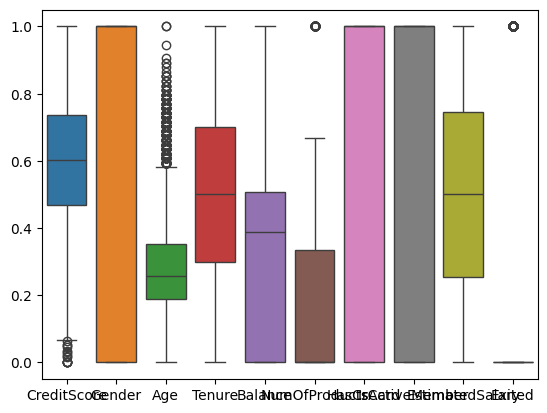

In [57]:
sns.boxplot(df_scaled)

<Axes: >

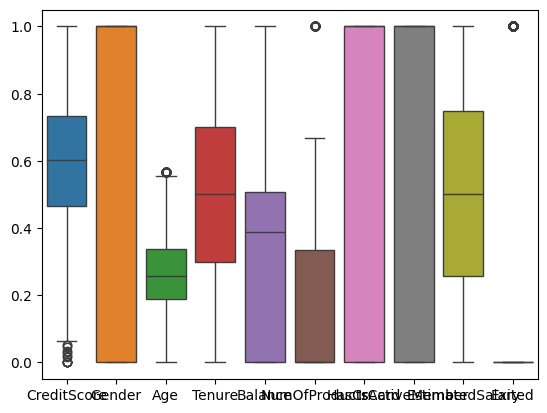

In [58]:
Q1=df_scaled['Age'].quantile(0)
Q3=df_scaled['Age'].quantile(0.40)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df_without_outliers=df_scaled[(df_scaled['Age']>=lower_bound)&(df_scaled['Age']<=upper_bound)]
sns.boxplot(df_without_outliers)

In [59]:
y=df_scaled['EstimatedSalary']
X=df_scaled.drop('EstimatedSalary',axis=1)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [64]:
model=keras.Sequential()
model.add(keras.layers.Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(1,activation='linear'))


In [66]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['mse'])
model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.6915 - mse: 0.0835 - val_loss: 0.6949 - val_mse: 0.0831
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6920 - mse: 0.0833 - val_loss: 0.6976 - val_mse: 0.0845
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6925 - mse: 0.0829 - val_loss: 0.6977 - val_mse: 0.0845
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6920 - mse: 0.0825 - val_loss: 0.7009 - val_mse: 0.0861
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6919 - mse: 0.0823 - val_loss: 0.6984 - val_mse: 0.0848
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6926 - mse: 0.0815 - val_loss: 0.6962 - val_mse: 0.0838
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6906 - mse: 0.0813 - val_loss: 0.6969 - val_mse: 0.0842
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6903 - mse: 0.0817 - val_loss: 0.6960 - val_mse: 0.0837
Epoch 9/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

In [67]:
model.evaluate(X_test,y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6972 - mse: 0.0861


[0.6979893445968628, 0.0849492996931076]